In [1]:
import numpy as np
import pandas as pd
import os
import csv
import datetime

%matplotlib inline

#Data source: ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/gridded/

### Retrieve the data and put it in a useable format

In [2]:
f = open('NOAAGlobalTemp.gridded.v4.0.1.201701.asc', 'r')
new = open('NOAAGlobalTempGrided.txt', 'w')
reader = csv.reader(f, quoting=csv.QUOTE_NONE)
for row in reader:
    new.write(row[0])
    new.write("\n")
f.close()
new.close()


In [3]:
latitude = np.arange(-87.5, 87.5 + 5., 5.)
longitude = np.arange(2.5, 357.5 + 5., 5.)
months = range(1,13)
years = range(1880,2017)
points = list()

In [4]:
count=0
for y in years:
    for m in months:
        for lat in latitude:
            for lon in longitude:
                points.append([datetime.datetime(year=y, month=m, day=1),lat,lon,0])
                count += 1
print count, len(points[0])

4261248 4


In [5]:
data = open('NOAAGlobalTempGrided.txt', 'r')

count=0
for line in data:
    l = line.strip().split()
    if len(l) == 72:
        for reading in l:
            try:
                points[count][3] = float(reading)
            except:
                pass
            count += 1    

In [6]:
points = np.array(points)
points.shape

(4261248, 4)

In [7]:
points[0], points[-1], points[1000]

(array([datetime.datetime(1880, 1, 1, 0, 0), -87.5, 2.5, -999.9], dtype=object),
 array([datetime.datetime(2016, 12, 1, 0, 0), 87.5, 357.5, -999.9], dtype=object),
 array([datetime.datetime(1880, 1, 1, 0, 0), -22.5, 322.5, 0.0029], dtype=object))

In [8]:
temp = pd.DataFrame(points, index=None, columns=['date','latitdue','longitude','anomaly'])

In [9]:
temp.head()

,date,latitdue,longitude,anomaly
0,1880-01-01 00:00:00,-87.5,2.5,-999.9
1,1880-01-01 00:00:00,-87.5,7.5,-999.9
2,1880-01-01 00:00:00,-87.5,12.5,-999.9
3,1880-01-01 00:00:00,-87.5,17.5,-999.9
4,1880-01-01 00:00:00,-87.5,22.5,-999.9


In [10]:
temp.to_csv('NOAAGriddedGlobalTempData.csv',sep=',',index=False)

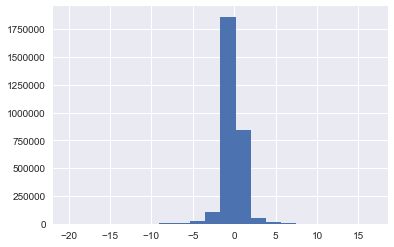

In [11]:
temp_1 = temp[temp['anomaly']>-999]
p=temp_1.anomaly.hist(bins=20)

In [12]:
temp201608 = temp[temp['date']==datetime.datetime(year=2016,month=8,day=1)]
temp201608.to_csv('NOAAGriddedGlobalTempData_082016.csv',sep=',',index=False)

#### Look at the distribution of the data

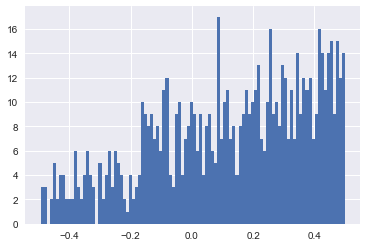

In [13]:
p=temp201608[(temp201608['anomaly']>-0.5) & (temp201608['anomaly']<0.5)].anomaly.hist(bins=100)

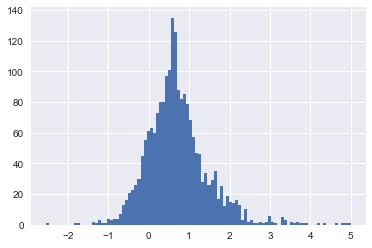

In [15]:
p=temp201608[(temp201608['anomaly']>-5) & (temp201608['anomaly']<5)].anomaly.hist(bins=100)